In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import weather_routing
import pandas


In [3]:
##################
# Waypoints for the Maridian 400
waypoints = pandas.DataFrame([
    (34.14104 , -119.25085,  'Channel Islands Start'),
    (32.72304, -121.86329 ,  'Meridian 400 Waypoint # 1 '),
    (31.65268 , -120.68278,  'Meridian 400 Waypoint # 2 '),
    (32.43059 , -119.12433,  'Cortez Bank Buoy'),
    (33.50608 , -118.62886,  'Catalina West End Gate'),
            ], columns=['lat', 'lng', 'name'])
##################

In [4]:
waypoints

,lat,lng,name
0,34.14104,-119.25085,Channel Islands Start
1,32.72304,-121.86329,Meridian 400 Waypoint # 1
2,31.65268,-120.68278,Meridian 400 Waypoint # 2
3,32.43059,-119.12433,Cortez Bank Buoy
4,33.50608,-118.62886,Catalina West End Gate


In [21]:
route = weather_routing.route_shortest_path(waypoints, hour_offset=0)

Channel Islands Start at 2024-12-10 10:00:00-08:00
Starting download GRIB2 file downloaded: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f000
0: twa=110 mag=224.7 dtg=149.2 sog=7.1
Starting download GRIB2 file downloaded: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f001
1: twa=110 mag=226.5 dtg=143.4 sog=6.0
Using GRIB2 file: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f002
2: twa=110 mag=223.8 dtg=138.4 sog=5.2
Using GRIB2 file: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f003
3: twa=110 mag=226.3 dtg=133.9 sog=4.6
Using GRIB2 file: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f004
4: twa=110 mag=217.8 dtg=130.3 sog=3.8
Using GRIB2 file: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f005
5: twa=120 mag=218.9 dtg=127.5 sog=3.1
Using GRIB2 file: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f006
6: twa=120 mag=214.2 dtg=125.3 sog=2.4
Using GRIB2 file: grib_files/gfs.20241210-18-gfs.t18z.pgrb2.0p25.f007
7: twa=120 mag=199.7 dtg=123.2 sog=2.9
Using GRIB2 file: grib_files/gf

In [18]:
route

,lat,lng,twa,mag,dtg,sog,date
0,34.141040,-119.250850,NaN,NaN,NaN,NaN,NaT
1,34.073311,-119.328174,90.0,223.410699,150.724545,5.595773,2024-12-11 20:00:00-08:00
2,34.032820,-119.378962,90.0,226.116118,147.297448,3.506164,2024-12-11 21:00:00-08:00
3,33.974928,-119.435273,75.0,218.897194,143.096873,4.465103,2024-12-11 22:00:00-08:00
4,33.949891,-119.445515,52.0,198.742847,141.888908,1.587423,2024-12-11 23:00:00-08:00
...,...,...,...,...,...,...,...
88,33.198407,-118.497366,44.8,18.741913,19.614661,6.130000,2024-12-15 11:00:00-08:00
89,33.295103,-118.458182,44.8,18.711100,15.285527,6.130000,2024-12-15 12:00:00-08:00
90,33.334025,-118.571130,44.8,292.440775,10.727696,6.130000,2024-12-15 13:00:00-08:00
91,33.428661,-118.525244,44.8,22.029495,6.967021,6.130000,2024-12-15 14:00:00-08:00


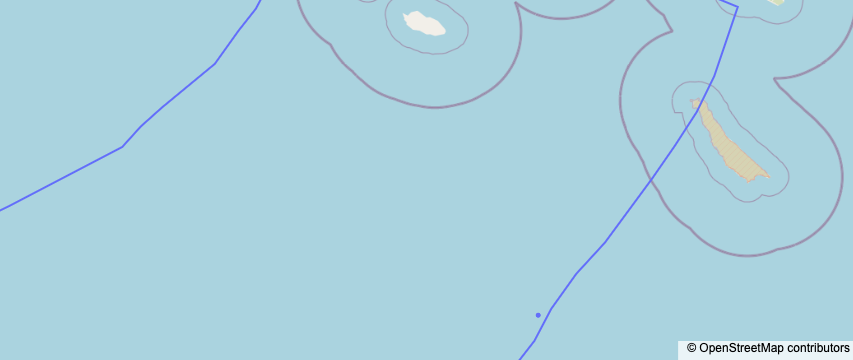

In [19]:
import plotly.express
fig = plotly.express.line_map(route, lat="lat", lon="lng", 
                              hover_name="date",
                              zoom=3, height=500)

scatter_points = plotly.express.scatter_map(waypoints,    
                lat="lat",
                lon="lng",
                hover_name="name")
fig.add_traces(scatter_points.data)

fig.update_layout(map_style="open-street-map", map_zoom=7, 
                  #map_center_lat = 33.9,
                  #map_center_lon=-118.5,
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.show()